In [65]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, PIL
from glob import glob
import tensorflow as tf
from io import StringIO 
from PIL import Image
import pydot
import imageio as iio
import cv2

from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

#import seaborn as sns
from sklearn import model_selection


import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import  img_to_array
from tensorflow.keras.preprocessing.image import array_to_img


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tqdm import tqdm

In [66]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [68]:
""" Sequential Model Architecture """
Sequential = tf.keras.models.Sequential

""" Data Preprocessing Functions """
Resizing = tf.keras.layers.experimental.preprocessing.Resizing
Rescaling = tf.keras.layers.experimental.preprocessing.Rescaling

""" Data Augmentation Functions """
RandomFlip = tf.keras.layers.experimental.preprocessing.RandomFlip
RandomRotation = tf.keras.layers.experimental.preprocessing.RandomRotation
RandomZoom = tf.keras.layers.experimental.preprocessing.RandomZoom

""" Artificial Neural Network Layer Inventory """
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

""" Convolutional Neural Network Layer Inventory """
Conv2D = tf.keras.layers.Conv2D
MaxPool2D = tf.keras.layers.MaxPool2D
Flatten = tf.keras.layers.Flatten

""" Residual Network Layer Inventory """
ResNet50 = tf.keras.applications.resnet50.ResNet50

""" Function to Load Images from Target Folder """
get_image_data = tf.keras.utils.image_dataset_from_directory

In [69]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 100, 100

In [70]:
if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)

In [71]:
train_data_dir ='Train1'
validation_data_dir ='Dev'
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 25

In [94]:
class_names = ['Real','Attack']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (100, 100)

In [95]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # warning disabling

training_dataset = get_image_data(
    directory=train_data_dir,
    seed=42,
    image_size=(img_width, img_height),
    batch_size=batch_size
)

validation_dataset = get_image_data(
    directory=validation_data_dir,
    seed=42,
    image_size=(img_width, img_height),
    batch_size=batch_size
)
class_names=training_dataset.class_names
print(class_names)

Found 1058 files belonging to 2 classes.
Found 855 files belonging to 2 classes.
['Attack', 'Real']


In [96]:
def load_data():
    datasets = ['Train1', 'Dev']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [97]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading Train1


100%|██████████| 293/293 [00:00<00:00, 1360.11it/s]


Loading Dev


100%|██████████| 209/209 [00:00<00:00, 1415.93it/s]


In [98]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1058
Number of testing examples: 855
Each image is of size: (100, 100)


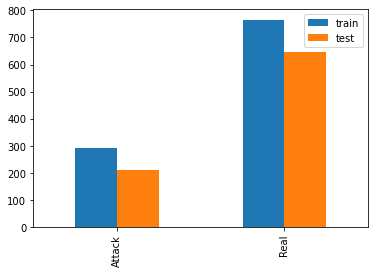

In [99]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

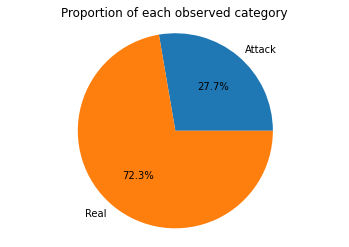

In [100]:
plt.pie(train_counts,
        explode=(0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()


In [101]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [102]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

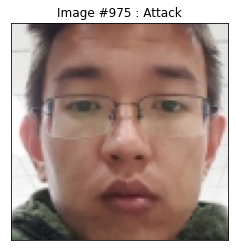

In [103]:
display_random_image(class_names, train_images, train_labels)

In [104]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

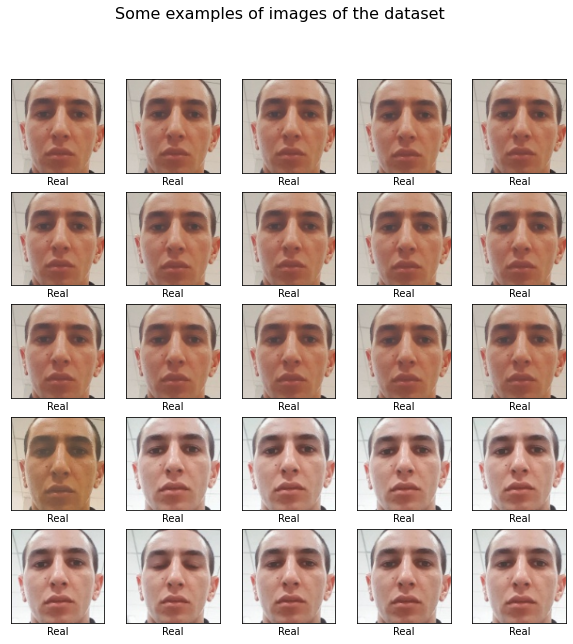

In [105]:
display_examples(class_names, train_images, train_labels)

In [106]:
resizing_layer = layers.experimental.preprocessing.Resizing(img_width, img_height)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, 
                                                                  input_shape=(img_width, img_height, 
                                                                               3))

def configure_performant_datasets(dataset, shuffling=None):
    """ Custom function to prefetch and cache stored elements 
    of retrieved image data to boost latency and performance 
    at the cost of higher memory usage. """    
    AUTOTUNE = tf.data.AUTOTUNE
    # Cache and prefetch elements of input data for boosted performance
    if not shuffling:
        return dataset.cache().prefetch(buffer_size=AUTOTUNE)
    else:
        return dataset.cache().shuffle(shuffling).prefetch(buffer_size=AUTOTUNE)
    
    
    
training_dataset = configure_performant_datasets(training_dataset, 
                                                 shuffling=1000)
validation_dataset = configure_performant_datasets(validation_dataset)


In [107]:
def plot_training_results(history):
    """
    Visualize results of the model training using `matplotlib`.

    The visualization will include charts for accuracy and loss, 
    on the training and as well as validation data sets.

    INPUTS:
        history(tf.keras.callbacks.History): 
            Contains data on how the model metrics changed 
            over the course of training.
    
    OUTPUTS: 
        None.
    """
    accuracy = history.history['accuracy']
    accuracy
    validation_accuracy = history.history['val_accuracy']
    validation_accuracy

    loss = history.history['loss']
    loss
    validation_loss = history.history['val_loss']
    validation_loss

    epochs_range = range(epochs)
    epochs_range

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, validation_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 99, 99, 16)        208       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 16)        1040      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 23, 23, 16)        1040      
                                                                 
 flatten_12 (Flatten)        (None, 8464)            

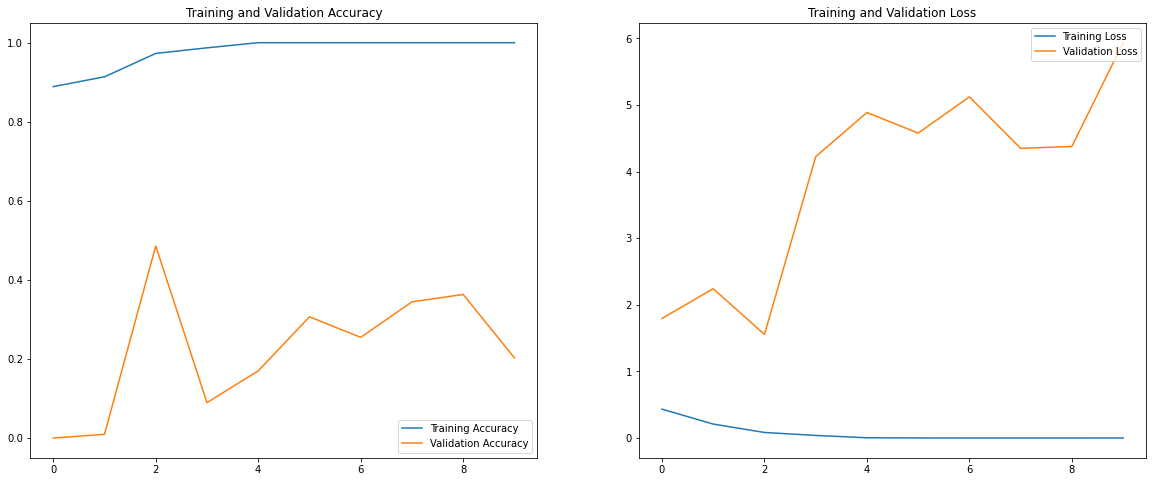

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 47, 47, 16)        2320      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 flatten_13 (Flatten)        (None, 7056)            

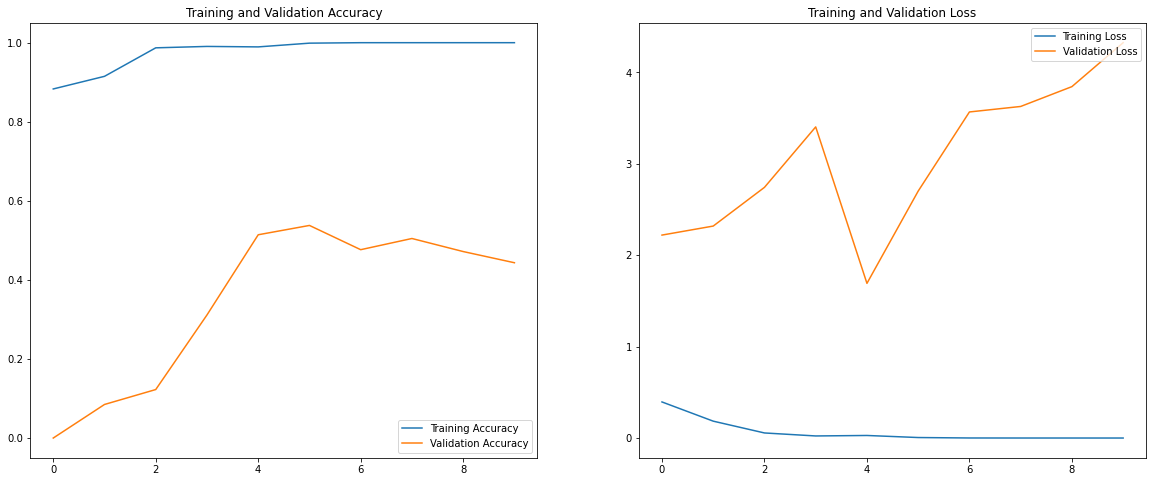

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 99, 99, 32)        416       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 48, 48, 32)        4128      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 23, 23, 32)        4128      
                                                                 
 flatten_14 (Flatten)        (None, 16928)           

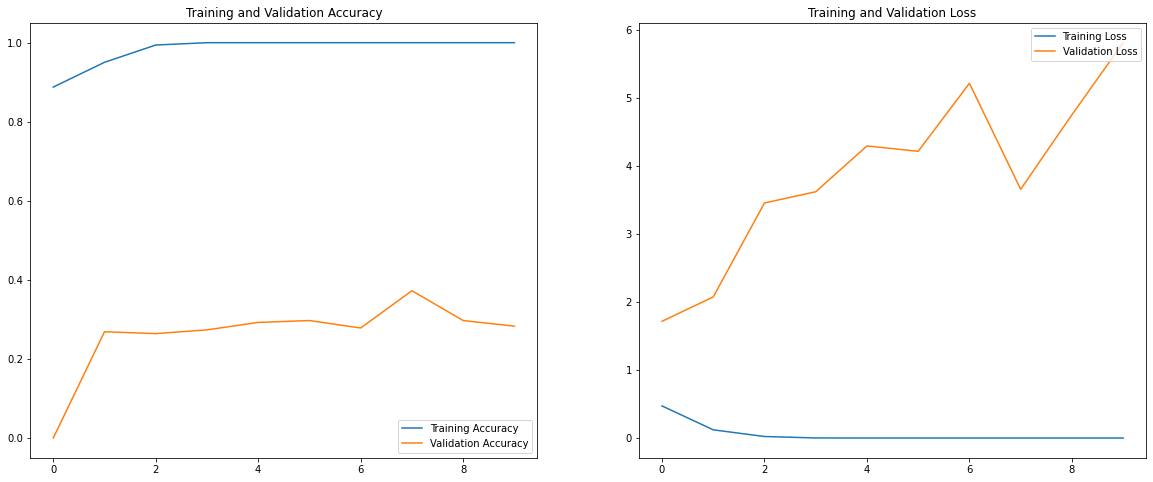

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 21, 21, 32)        9248      
                                                                 
 flatten_15 (Flatten)        (None, 14112)           

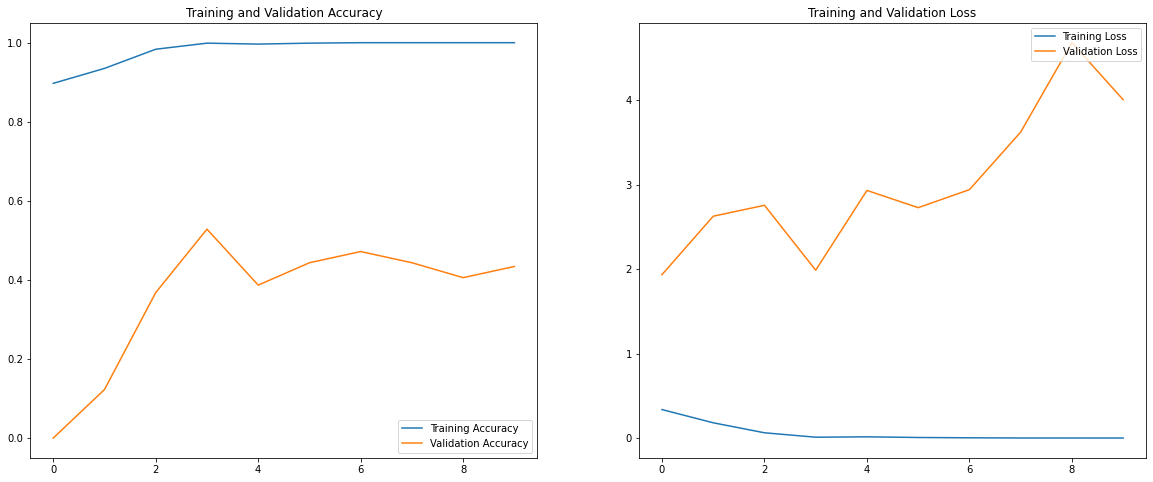

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 99, 99, 64)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 48, 48, 64)        16448     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 23, 23, 64)        16448     
                                                                 
 flatten_16 (Flatten)        (None, 33856)           

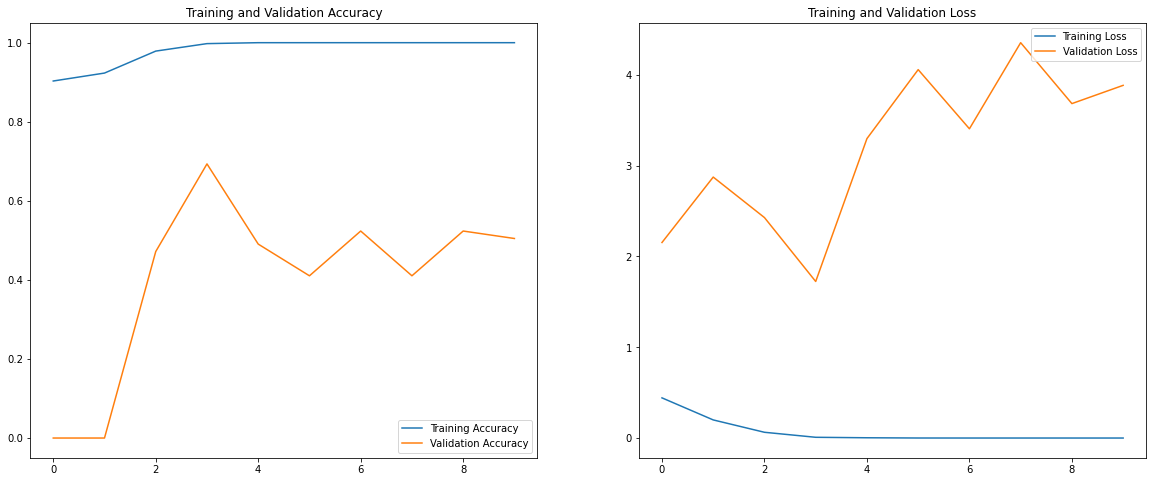

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 flatten_17 (Flatten)        (None, 28224)           

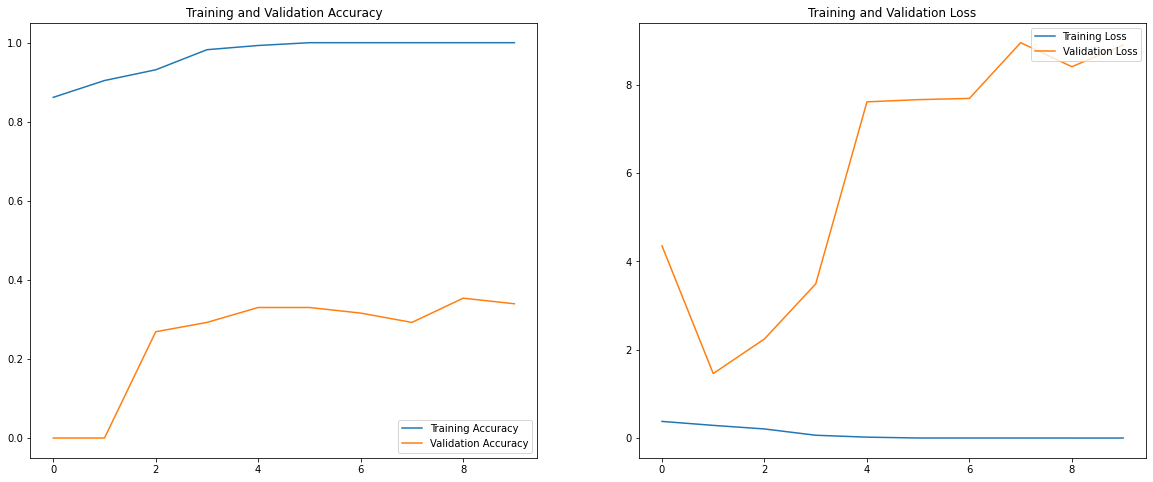

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 99, 99, 128)       1664      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 49, 49, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 48, 48, 128)       65664     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 24, 24, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 23, 23, 128)       65664     
                                                                 
 flatten_18 (Flatten)        (None, 67712)           

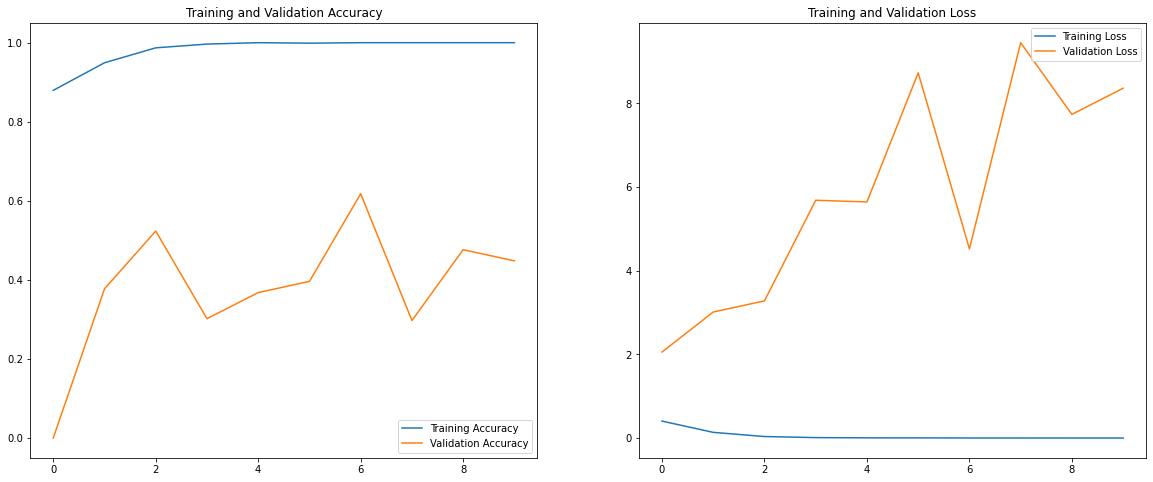

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 49, 49, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 47, 47, 128)       147584    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 21, 21, 128)       147584    
                                                                 
 flatten_19 (Flatten)        (None, 56448)           

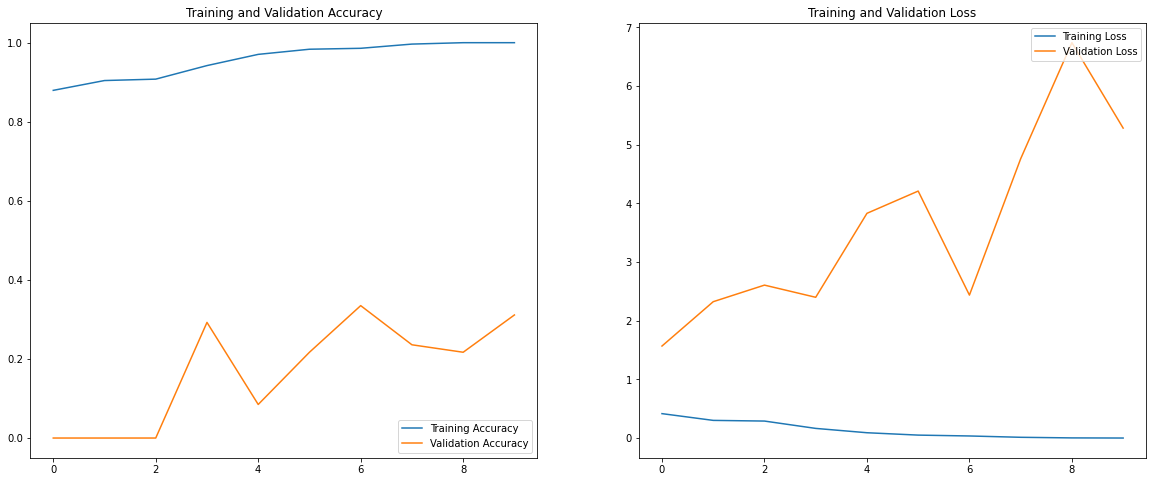

In [108]:
from tensorflow.keras import optimizers
filters = [[16,2],[16,3],[32,2],[32,3],[64,2],[64,3],[128,2],[128,3]]
for x,y in filters:
    model = Sequential()
    model.add(layers.Conv2D(x, (y, y), activation='relu', input_shape=(img_width,img_height,3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(x, (y, y), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(x, (y, y), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation = 'softmax'))
    model.summary()
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
			optimizer='Adam',
			metrics=['accuracy'])
    epochs = 10
    history = model.fit(train_images, train_labels, batch_size=25, epochs = epochs, validation_split = 0.2)
    plot_training_results(history)

In [109]:
test_loss = model.evaluate(test_images, test_labels)

27/27 [==============================] - 7s 206ms/step - loss: 0.8318 - accuracy: 0.8409


In [110]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [111]:
train_features = model.predict(training_dataset)
test_features = model.predict(validation_dataset)

35/35 [==============================] - 27s 761ms/step


In [112]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [113]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

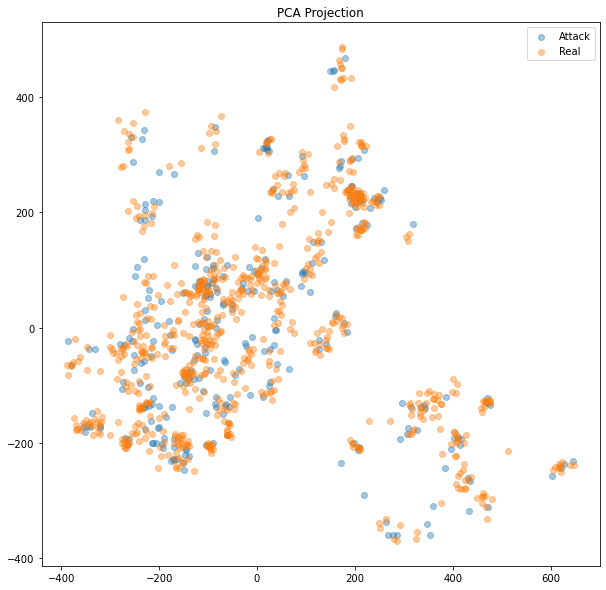

In [114]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()


In [116]:
resizing_layer = layers.experimental.preprocessing.Resizing(img_width, img_height)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, 
                                                                  input_shape=(img_width, img_height, 
                                                                               3))

def configure_performant_datasets(dataset, shuffling=None):
    """ Custom function to prefetch and cache stored elements 
    of retrieved image data to boost latency and performance 
    at the cost of higher memory usage. """    
    AUTOTUNE = tf.data.AUTOTUNE
    # Cache and prefetch elements of input data for boosted performance
    if not shuffling:
        return dataset.cache().prefetch(buffer_size=AUTOTUNE)
    else:
        return dataset.cache().shuffle(shuffling).prefetch(buffer_size=AUTOTUNE)
    
    
    
training_dataset = configure_performant_datasets(training_dataset, 
                                                 shuffling=1000)
validation_dataset = configure_performant_datasets(validation_dataset)


In [118]:
from tensorflow.keras import optimizers
filters = [[16,2],[16,3],[32,2],[32,3],[64,2],[64,3],[128,2],[128,3]]
for x,y in filters:
    model = Sequential()
    model.add(layers.Conv2D(x, (y, y), activation='relu', input_shape=(img_width,img_height,3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(x, (y, y), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(x, (y, y), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation = 'softmax'))
    model.summary()
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
			optimizer='Adam',
			metrics=['accuracy'])
    epochs = 20
    history = model.fit(train_images, train_labels, batch_size=128, epochs=epochs, validation_split = 0.2)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 99, 99, 16)        208       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 48, 48, 16)        1040      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 23, 23, 16)        1040      
                                                                 
 flatten_21 (Flatten)        (None, 8464)            

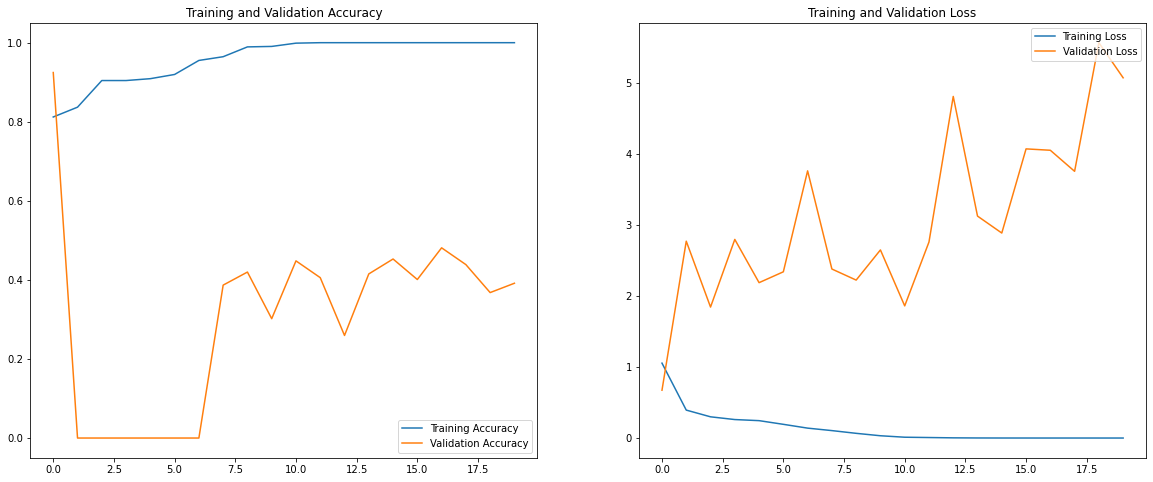

In [120]:
plot_training_results(history)

In [123]:
test_loss = model2.evaluate(test_features, test_labels)

27/27 [==============================] - 1s 26ms/step - loss: 10.3394 - accuracy: 0.0000e+00


In [124]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [135]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (3, 3, 512)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [136]:
histories = []

for i in range(n_estimators):
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=25, epochs=10, validation_split = 0.1))

Epoch 1/10
31/31 [==============================] - 4s 30ms/step - loss: 6.1682 - accuracy: 0.5782 - val_loss: 3.2490 - val_accuracy: 0.6471
Epoch 2/10
31/31 [==============================] - 0s 6ms/step - loss: 2.6388 - accuracy: 0.6518 - val_loss: 2.4228 - val_accuracy: 0.6824
Epoch 3/10
31/31 [==============================] - 0s 5ms/step - loss: 2.2495 - accuracy: 0.6649 - val_loss: 3.7757 - val_accuracy: 0.7059
Epoch 4/10
31/31 [==============================] - 0s 5ms/step - loss: 1.4339 - accuracy: 0.7096 - val_loss: 1.3554 - val_accuracy: 0.5882
Epoch 5/10
31/31 [==============================] - 0s 6ms/step - loss: 1.0506 - accuracy: 0.7595 - val_loss: 1.7797 - val_accuracy: 0.5412
Epoch 6/10
31/31 [==============================] - 0s 5ms/step - loss: 0.9757 - accuracy: 0.7346 - val_loss: 1.0236 - val_accuracy: 0.6353
Epoch 7/10
31/31 [==============================] - 0s 5ms/step - loss: 0.9213 - accuracy: 0.7451 - val_loss: 1.6430 - val_accuracy: 0.7294
Epoch 8/10
31/31 [=

In [137]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

27/27 [==============================] - 0s 2ms/step


In [138]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.5812865497076023


In [139]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [140]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

27/27 [==============================] - 19s 663ms/step


In [177]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)
input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output
new_model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (6, 6, 512)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.softmax)
                                ])

In [178]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [179]:
new_model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_78 (Flatten)        (None, 18432)             0         
                                                                 
 dense_156 (Dense)           (None, 83)                1529939   
                                                                 
 dense_157 (Dense)           (None, 1024)              86016     
                                                                 
Total params: 1,615,955
Trainable params: 1,615,955
Non-trainable params: 0
_________________________________________________________________


In [181]:
history5 = new_model.fit(train_features, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
7/7 [==============================] - 0s 27ms/step - loss: 1.6662e-05 - accuracy: 1.0000 - val_loss: 5.0530 - val_accuracy: 0.1745
Epoch 2/20
7/7 [==============================] - 0s 23ms/step - loss: 1.5764e-05 - accuracy: 1.0000 - val_loss: 5.0907 - val_accuracy: 0.1745
Epoch 3/20
7/7 [==============================] - 0s 23ms/step - loss: 1.3930e-05 - accuracy: 1.0000 - val_loss: 5.1316 - val_accuracy: 0.1745
Epoch 4/20
7/7 [==============================] - 0s 24ms/step - loss: 1.2634e-05 - accuracy: 1.0000 - val_loss: 5.1727 - val_accuracy: 0.1745
Epoch 5/20
7/7 [==============================] - 0s 22ms/step - loss: 1.1931e-05 - accuracy: 1.0000 - val_loss: 5.2175 - val_accuracy: 0.1745
Epoch 6/20
7/7 [==============================] - 0s 31ms/step - loss: 1.0732e-05 - accuracy: 1.0000 - val_loss: 5.2554 - val_accuracy: 0.1698
Epoch 7/20
7/7 [==============================] - 0s 23ms/step - loss: 1.0132e-05 - accuracy: 1.0000 - val_loss: 5.2988 - val_accuracy: 0.1698

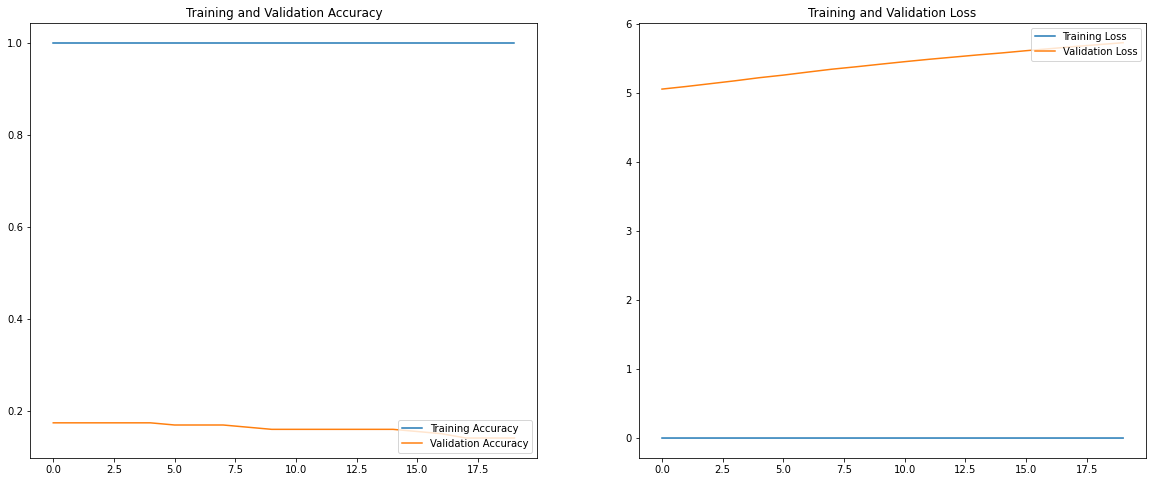

In [183]:
plot_training_results(history5)

In [184]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))


27/27 [==============================] - 0s 3ms/step
Accuracy : 0.8292397660818713
